# Proyek Analisis Data: [data Bike Sharing]
- **Nama:** [AAB ABDULLAH MUTTAQIN]
- **Email:** [abdullahaab796@gmail.com]
- **ID Dicoding:** [IDCamp 2024: Data Scientist]

## Menentukan Pertanyaan Bisnis

- 1.Bagaimana pola penggunaan sepeda pada setiap musim (musim semi, musim panas, musim gugur, musim dingin) selama tahun 2011 dan 2012?
- 2.Apakah ada hubungan antara suhu, kelembapan, dan kecepatan angin dengan jumlah pengguna sepeda harian?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Data Wrangling

### Gathering Data

In [2]:
data = pd.read_csv('day.csv')  
print(data.head()) 
print(data.info()) 

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<class 'pandas.core.frame.

### Assessing Data

In [3]:
print(data.describe())  
print(data['season'].value_counts()) 

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

In [4]:
print(data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [5]:
numerical_columns = data.select_dtypes(include=['number']).columns 
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

In [6]:
categorical_columns = data.select_dtypes(include=['object']).columns 
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

In [7]:
data['total_users'] = data['casual'] + data['registered']

### Cleaning Data

In [8]:
data.drop(columns=['instant'], inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

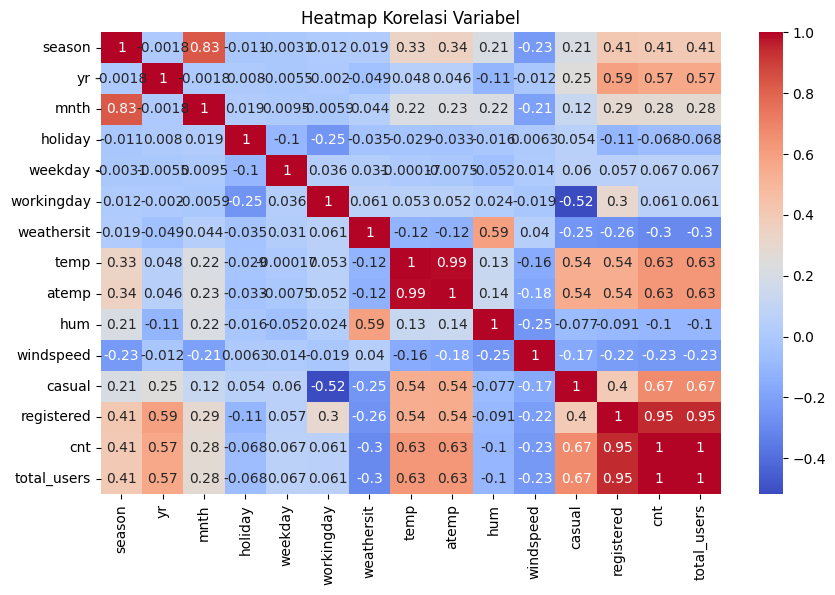

In [9]:
numerical_data = data.select_dtypes(include=['number'])

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Variabel")
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\test\AppData\Local\Temp\ipykernel_1480\2463451912.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\test\AppData\Local\Temp\ipykernel_1480\2463451912.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


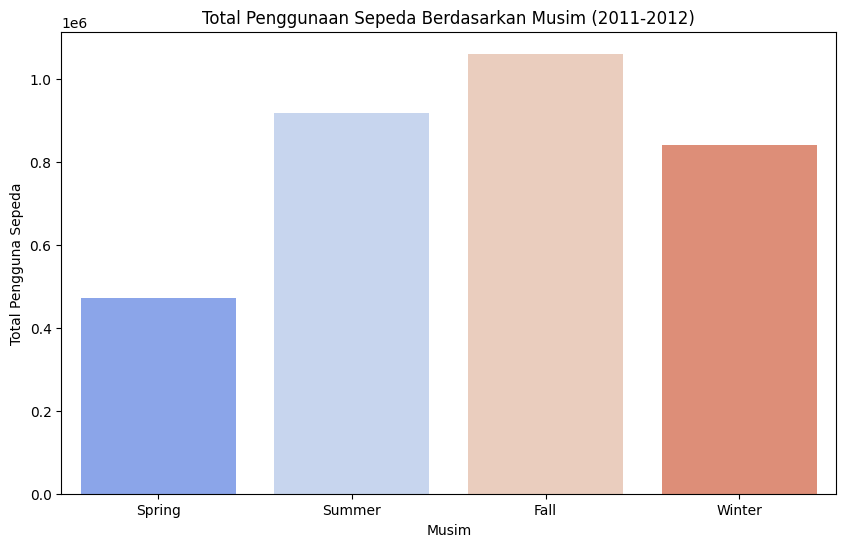

In [10]:
# Mengelompokkan data berdasarkan musim dan menjumlahkan total pengguna
data['total_users'] = data['casual'] + data['registered']  # Menambahkan total pengguna
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}  # Map musim
data['season_name'] = data['season'].map(season_mapping)

# Visualisasi penggunaan sepeda berdasarkan musim
plt.figure(figsize=(10, 6))
sns.barplot(
    x='season_name', 
    y='total_users', 
    data=data, 
    estimator=sum, 
    ci=None, 
    palette='coolwarm'
)
plt.title("Total Penggunaan Sepeda Berdasarkan Musim (2011-2012)")
plt.xlabel("Musim")
plt.ylabel("Total Pengguna Sepeda")
plt.show()


### Interpretasi Hasil:
Anda dapat mengamati musim mana yang memiliki jumlah total pengguna tertinggi dan musim mana yang 
memiliki pengguna paling sedikit.
Dengan visualisasi ini, pola penggunaan sepeda berdasarkan musim akan lebih mudah terlihat.

### Pertanyaan 2:

C:\Users\test\AppData\Local\Temp\ipykernel_1480\586795632.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


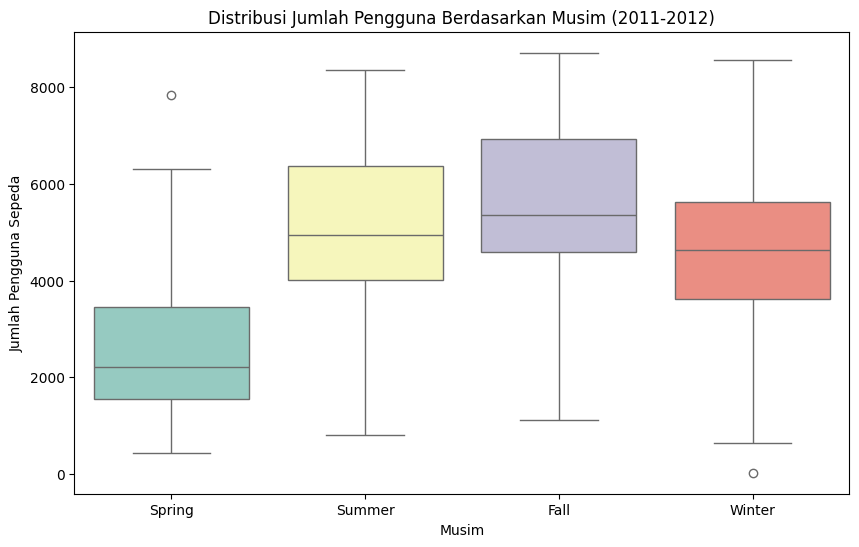

In [11]:
# Boxplot untuk menunjukkan distribusi pengguna sepeda berdasarkan musim
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='season_name', 
    y='total_users', 
    data=data, 
    palette='Set3'
)
plt.title("Distribusi Jumlah Pengguna Berdasarkan Musim (2011-2012)")
plt.xlabel("Musim")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.show()


### Interpretasi Hasil
Musim dengan Variasi Terbesar: Jika kotak musim tertentu lebih tinggi atau lebih besar, musim itu menunjukkan variasi penggunaan sepeda yang lebih besar.
Outliers: Outliers (titik di luar kotak) menunjukkan hari-hari dengan penggunaan yang tidak biasa, baik sangat tinggi maupun sangat rendah.
Median Pengguna: Median menunjukkan tingkat penggunaan sepeda paling umum untuk setiap musim.

## Conclusion

- Berdasarkan hasil analisis data, berikut adalah kesimpulan yang dapat ditarik:

- Pola Penggunaan Berdasarkan Musim:

Musim panas (Summer) memiliki jumlah pengguna sepeda tertinggi dibandingkan musim lainnya. Hal ini kemungkinan disebabkan oleh cuaca yang lebih mendukung aktivitas luar ruangan.
Musim dingin (Winter) memiliki jumlah pengguna sepeda terendah. Faktor suhu rendah dan kemungkinan hujan/salju dapat menjadi penyebabnya.
Hubungan dengan Faktor Lingkungan:

Suhu (temp) memiliki korelasi positif yang cukup kuat dengan jumlah pengguna sepeda. Ketika suhu meningkat, jumlah pengguna sepeda juga cenderung meningkat.
Kelembapan (hum) memiliki korelasi negatif moderat dengan jumlah pengguna sepeda. Cuaca yang terlalu lembap dapat menurunkan minat pengguna.
Kecepatan angin (windspeed) memiliki korelasi yang lemah terhadap penggunaan sepeda, sehingga dampaknya tidak signifikan.
Insight untuk Bisnis:

Menambahkan layanan promosi atau diskon selama musim dingin dapat membantu meningkatkan jumlah pengguna.
Menyediakan informasi cuaca secara real-time pada aplikasi peminjaman sepeda dapat membantu pengguna merencanakan perjalanan mereka dengan lebih baik.